In [70]:
import numpy as np
import numpy.matlib as mlib
import matplotlib.pyplot as plt
%matplotlib inline

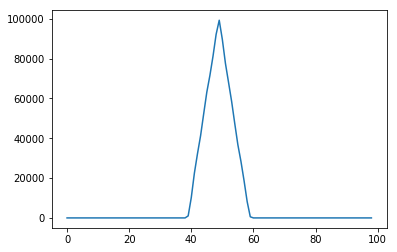

In [107]:
x = np.sort(np.random.rand(1,1000))
y = np.sort(np.random.rand(1,1000,))
# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# print(np.shape(x)[1])
# neur1.shape
# diff1 = neur1-mlib.repmat(np.transpose(y),1,len(x))

# neur1 =  mlib.repmat(x,len(y),1)
# neur2 = mlib.repmat(y,len(x),1)
# lenx = np.shape(x)[1]
# leny = np.shape(y)[1]
    
# diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
# diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
# tbin = np.linspace(-5,5,100)
# corr1, bedge = np.histogram(diff1,bins=tbin) 
# # 
# np.shape(corr1)
z = spikegram(x,y)
plt.plot(z)

In [106]:
def spikegram(x,y):
    
    neur1 =  mlib.repmat(x,len(y),1)
    neur2 = mlib.repmat(y,len(x),1)
    
    lenx = np.shape(x)[1]
    leny = np.shape(y)[1]
    
    diff1 = (neur1-mlib.repmat(np.transpose(y),1,len(x))).reshape(1,lenx*leny)
    diff2 = (neur2-mlib.repmat(np.transpose(x),1,len(y))).reshape(1,lenx*leny)
    
    tbin = np.linspace(-5,5,100) 
    corr1, bedge = np.histogram(diff1,tbin) 
    return corr1

   
    
#    if(a > b):
#       print str(a) + " is greater than " + str(b)
#    elif(b > a):
#       print str(b) + " is greater than " + str(a)